# Netflix Engagement Trends in 2023

Author: Peter Wu

---

# Table of contents

### 1. [Loading Data and EDA](#eda)
### 2. [Creating Plot](#plot)

---

## 1. Loading Data and EDA <a name="eda"></a>

In [5]:
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, geom_violin, geom_line, \
aes, stat_smooth, facet_wrap, theme_bw, scale_y_continuous, geom_boxplot, \
geom_label, annotate, guides, theme_classic, theme, geom_hline, stage, \
theme_light, scale_fill_manual, labs, scale_x_log10, scale_y_log10, \
ggsave, geom_label, geom_text, geom_histogram
from mizani.formatters import percent_format, comma_format, custom_format, log_format

In [6]:
from google.colab import drive
drive.mount('/content/drive') # comment out if you don't want to save to Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# comment out if you don't want to save to Google Drive
%cd /content/drive/MyDrive/Plots/

/content/drive/MyDrive/Plots


In [8]:
janjune2023 = pd.read_csv("https://raw.githubusercontent.com/pwu97/viz/main/JanJune2023.csv")
julydec2023 = pd.read_csv("https://raw.githubusercontent.com/pwu97/viz/main/JulDec2023.csv")

In [9]:
janjune2023.head()

,Title,Available Globally?,Release Date,Hours Viewed
0,The Night Agent: Season 1,Yes,2023-03-23,"812,100,000"
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"665,100,000"
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"622,800,000"
3,Wednesday: Season 1,Yes,2022-11-23,"507,700,000"
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"503,000,000"


In [10]:
print((pd.to_datetime("2023-01-05") - pd.to_datetime("2023-01-01")).days) # off by one
(pd.to_datetime("2023-01-05") - pd.to_datetime("2023-01-01")).days+1 # need to add one to get days between

4


5

In [11]:
# define period start/end dates
firsthalf_start = "2023-01-01"
firsthalf_end = "2023-06-30"
secondhalf_start = "2023-07-01"
secondhalf_end = "2023-12-31"

# deal with edge cases
# janjune2023_extract = janjune2023[janjune2023["Release Date"] == "2023-06-30"]
# janjune2023 = janjune2023[janjune2023["Release Date"] != "2023-06-30"]

# clean data and get days the show was released in period
janjune2023["Hours Viewed"].replace(",", "", inplace=True, regex=True)
janjune2023["Hours Viewed"] = janjune2023["Hours Viewed"].astype(int)
janjune2023.fillna({'Release Date': firsthalf_start}, inplace=True)
janjune2023["Days in Measurement Period"] = (
    np.where((pd.to_datetime(firsthalf_end) - pd.to_datetime(janjune2023["Release Date"])).dt.days+1 <= 181,
             (pd.to_datetime(firsthalf_end) - pd.to_datetime(janjune2023["Release Date"])).dt.days+1,
             181 # days in first half of 2023
    )
)
janjune2023["Hours Viewed Per Day"] = (
    janjune2023["Hours Viewed"] / janjune2023["Days in Measurement Period"]
)

# deal with edge cases
# julydec2023 = pd.concat([janjune2023_extract, julydec2023])
# julydec2023["Release Date"].replace("2023-06-30", "2023-07-01", inplace=True)
# julydec2023 = julydec2023[julydec2023["Release Date"] != "2023-12-31"]

# same for july-dec 2023
julydec2023["Hours Viewed"].replace(",", "", inplace=True, regex=True)
julydec2023["Hours Viewed"] = julydec2023["Hours Viewed"].astype(int)
julydec2023.fillna({'Release Date': secondhalf_start}, inplace=True)
julydec2023["Days in Measurement Period"] = (
    np.where((pd.to_datetime(secondhalf_end) - pd.to_datetime(julydec2023["Release Date"])).dt.days+1 <= 184,
             (pd.to_datetime(secondhalf_end) - pd.to_datetime(julydec2023["Release Date"])).dt.days+1,
             184 # days in second half of 2023
    )
)
julydec2023["Hours Viewed Per Day"] = (
    julydec2023["Hours Viewed"] / julydec2023["Days in Measurement Period"]
)
julydec2023

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Days in Measurement Period,Hours Viewed Per Day
0,ONE PIECE: Season 1,Yes,2023-08-31,541900000,7:34,"71,600,000",123,4.405691e+06
1,Dear Child: Limited Series // Liebes Kind: Min...,Yes,2023-09-07,252800000,4:49,"52,500,000",116,2.179310e+06
2,Who is Erin Carter?: Limited Series,Yes,2023-08-24,286200000,5:43,"50,100,000",130,2.201538e+06
3,Lupin: Part 3,Yes,2023-10-05,274300000,5:31,"49,700,000",88,3.117045e+06
4,The Witcher: Season 3,Yes,2023-06-29,363800000,7:36,"47,900,000",184,1.977174e+06
...,...,...,...,...,...,...,...,...
6594,We Are Black and British: Season 1,No,2023-07-01,100000,1:57,"100,000",184,5.434783e+02
6595,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,100000,0:59,"100,000",184,5.434783e+02
6596,Whitney Cummings: Jokes,No,2022-07-26,100000,1:00,"100,000",184,5.434783e+02
6597,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,100000,1:15,"100,000",184,5.434783e+02


In [12]:
# create new column for filtering
janjune2023["Period2023"] = "First Half"
julydec2023["Period2023"] = "Second Half"

In [13]:
julydec2023[julydec2023["Release Date"] == "2023-07-01"] # sanity check

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Days in Measurement Period,Hours Viewed Per Day,Period2023
20,Suits (2011): Season 1,Yes,2023-07-01,247700000,*,"26,900,000",184,1.346196e+06,Second Half
23,Young Sheldon: Season 1,No,2023-07-01,188400000,7:13,"26,100,000",184,1.023913e+06,Second Half
28,Little Angel: Volume 3,Yes,2023-07-01,78100000,3:23,"23,100,000",184,4.244565e+05,Second Half
32,Suits (2011): Season 2,Yes,2023-07-01,249400000,11:30,"21,700,000",184,1.355435e+06,Second Half
39,Bebefinn: Season 1,Yes,2023-07-01,51400000,2:32,"20,300,000",184,2.793478e+05,Second Half
...,...,...,...,...,...,...,...,...,...
6587,Two Weeks to a Stronger Core: Volume 1,Yes,2023-07-01,100000,1:48,"100,000",184,5.434783e+02,Second Half
6589,Vem Dançar com o Universo Z: Season 3,No,2023-07-01,100000,0:54,"100,000",184,5.434783e+02,Second Half
6590,Vietnamese Horror Story: Season 1 // Chuyện ma...,No,2023-07-01,100000,1:46,"100,000",184,5.434783e+02,Second Half
6594,We Are Black and British: Season 1,No,2023-07-01,100000,1:57,"100,000",184,5.434783e+02,Second Half


/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: netflix_cumsum_engage.png


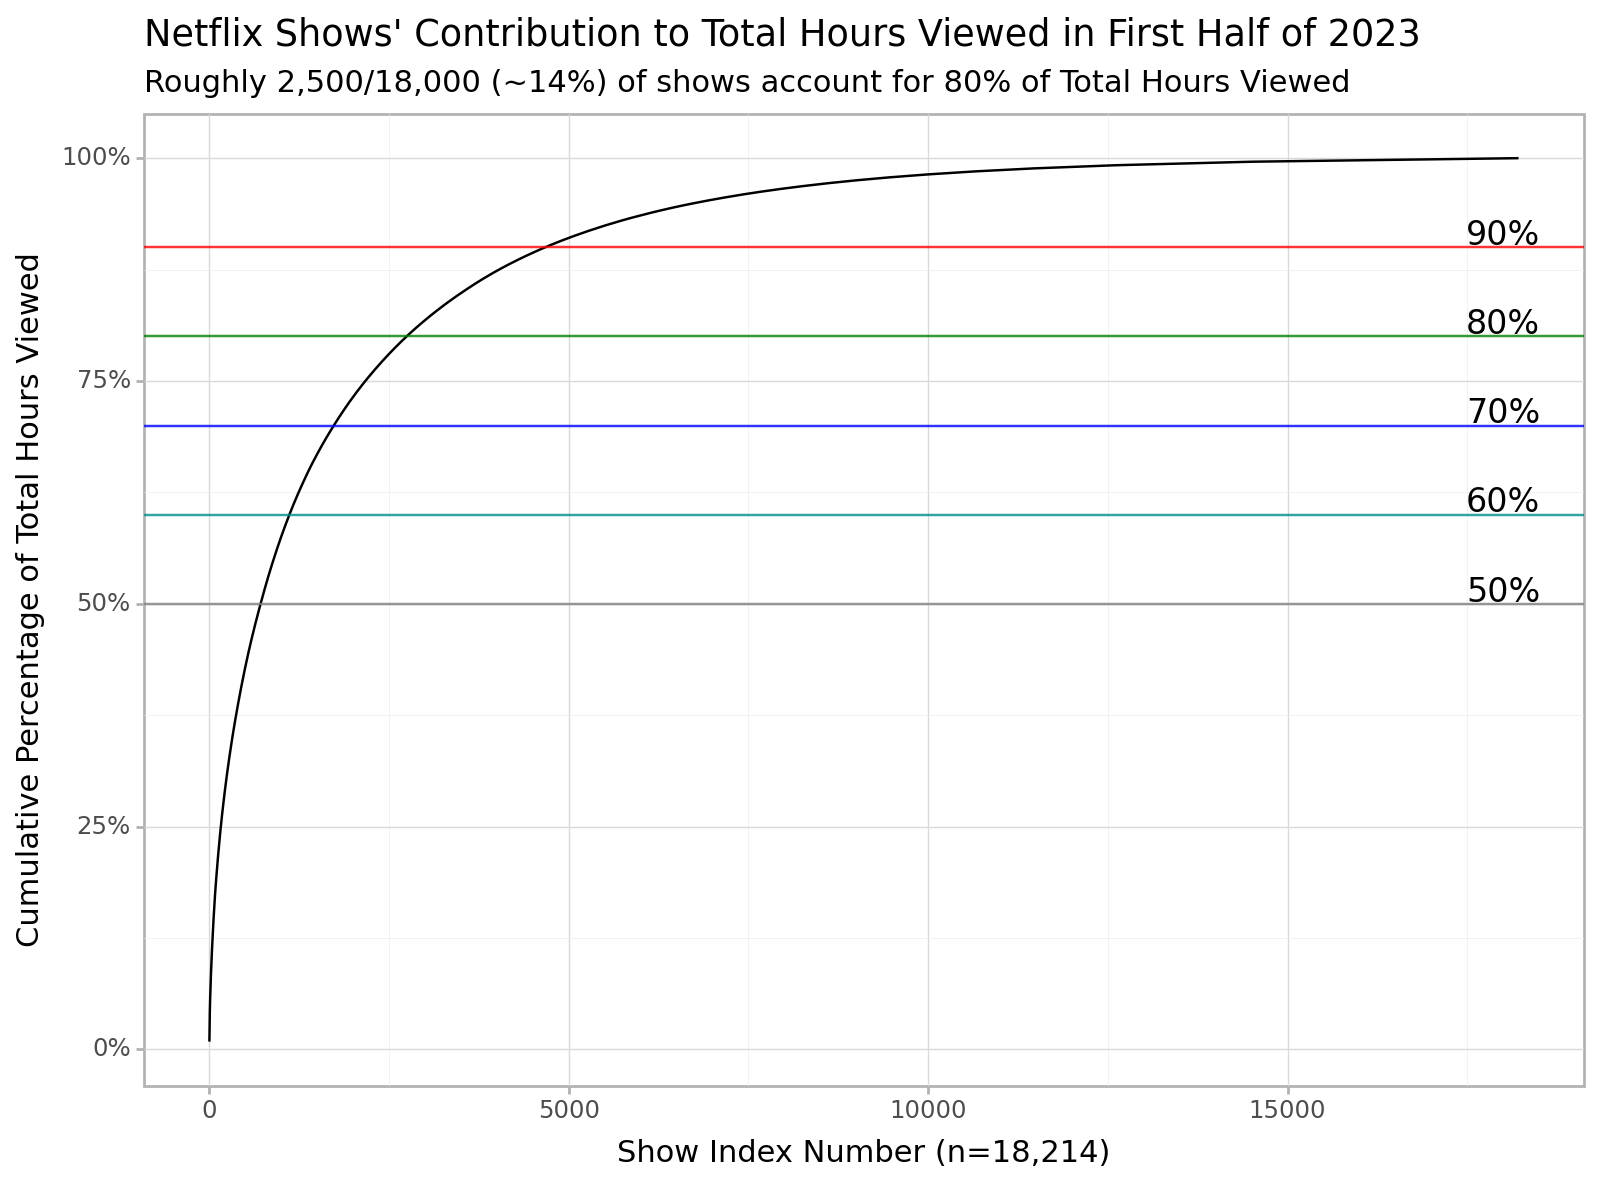

<Figure Size: (800 x 600)>

In [14]:
# prepare dataframe for cumulative percentage plot
janjune2023.sort_values(by=["Hours Viewed"], ascending=False, inplace=True)
janjune2023["cumsum"] = janjune2023["Hours Viewed"].cumsum()/janjune2023["Hours Viewed"].sum()
janjune2023["row_number"] = range(1, len(janjune2023)+1)
# print(janjune2023[janjune2023["row_number"] == 5000])

# make cumulative percentage plot for total hours viewed
vjust=0.0011*12
cumsum_engage = (
  ggplot(janjune2023, aes(x = range(1, len(janjune2023)+1), y = "cumsum"))
    + geom_line()
    + geom_hline(yintercept = 0.9, color="red", alpha=0.8)
    + annotate("text", x=18000, y=0.9+vjust, size=12, label="90%")
    + geom_hline(yintercept = 0.8, color="green", alpha=0.8)
    + annotate("text", x=18000, y=0.8+vjust, size=12, label="80%")
    + geom_hline(yintercept = 0.7, color="blue", alpha=0.8)
    + annotate("text", x=18000, y=0.7+vjust, size=12, label="70%")
    + geom_hline(yintercept = 0.6, color="darkcyan", alpha=0.8)
    + annotate("text", x=18000, y=0.6+vjust, size=12, label="60%")
    + geom_hline(yintercept = 0.5, color="gray", alpha=0.8)
    + annotate("text", x=18000, y=0.5+vjust, size=12, label="50%")
    + scale_y_continuous(labels = percent_format())
    + labs(x = "Show Index Number (n={:,})".format(len(janjune2023)),
           y = "Cumulative Percentage of Total Hours Viewed",
           title = "Netflix Shows' Contribution to Total Hours Viewed in First Half of 2023",
           subtitle = "Roughly {:,}/{:,} (~14%) of shows account for 80% of Total Hours Viewed".format(2500, 18000))
    + theme_light()
    + theme(figure_size=(8, 6))
)
ggsave(cumsum_engage, "netflix_cumsum_engage.png", dpi=300, limitsize=False) # comment out if you don't want to save to Google Drive
cumsum_engage

In [15]:
# julydec2023 = julydec2023[julydec2023["Hours Viewed"] > 1500000] # sanity check

In [16]:
janjune2023
julydec2023

,Title,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Days in Measurement Period,Hours Viewed Per Day,Period2023
0,ONE PIECE: Season 1,Yes,2023-08-31,541900000,7:34,"71,600,000",123,4.405691e+06,Second Half
1,Dear Child: Limited Series // Liebes Kind: Min...,Yes,2023-09-07,252800000,4:49,"52,500,000",116,2.179310e+06,Second Half
2,Who is Erin Carter?: Limited Series,Yes,2023-08-24,286200000,5:43,"50,100,000",130,2.201538e+06,Second Half
3,Lupin: Part 3,Yes,2023-10-05,274300000,5:31,"49,700,000",88,3.117045e+06,Second Half
4,The Witcher: Season 3,Yes,2023-06-29,363800000,7:36,"47,900,000",184,1.977174e+06,Second Half
...,...,...,...,...,...,...,...,...,...
6594,We Are Black and British: Season 1,No,2023-07-01,100000,1:57,"100,000",184,5.434783e+02,Second Half
6595,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,100000,0:59,"100,000",184,5.434783e+02,Second Half
6596,Whitney Cummings: Jokes,No,2022-07-26,100000,1:00,"100,000",184,5.434783e+02,Second Half
6597,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,100000,1:15,"100,000",184,5.434783e+02,Second Half


---

## 2. Creating Plot <a name="plot"></a>

In [17]:
# long format of dataset used for filtering (one row per observation)
df = (
    pd.concat([janjune2023[["Title", "Release Date", "Days in Measurement Period", "Hours Viewed Per Day", "Period2023"]],
               julydec2023[["Title", "Release Date", "Days in Measurement Period", "Hours Viewed Per Day", "Period2023"]]])
)
# left join the two data frames to get the difference between the two periods for each show
df2 = (
    janjune2023[["Title", "Release Date", "Days in Measurement Period", "Hours Viewed Per Day", "Period2023"]].merge(
        julydec2023[["Title", "Release Date", "Days in Measurement Period", "Hours Viewed Per Day", "Period2023"]], on="Title")
)

In [18]:
df

,Title,Release Date,Days in Measurement Period,Hours Viewed Per Day,Period2023
0,The Night Agent: Season 1,2023-03-23,100,8.121000e+06,First Half
1,Ginny & Georgia: Season 2,2023-01-05,177,3.757627e+06,First Half
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,181,3.440884e+06,First Half
3,Wednesday: Season 1,2022-11-23,181,2.804972e+06,First Half
4,Queen Charlotte: A Bridgerton Story,2023-05-04,58,8.672414e+06,First Half
...,...,...,...,...,...
6594,We Are Black and British: Season 1,2023-07-01,184,5.434783e+02,Second Half
6595,Whitney Cummings: Can I Touch It?,2019-07-30,184,5.434783e+02,Second Half
6596,Whitney Cummings: Jokes,2022-07-26,184,5.434783e+02,Second Half
6597,"Whose Vote Counts, Explained: Limited Series",2020-09-28,184,5.434783e+02,Second Half


In [19]:
df2.head()

,Title,Release Date_x,Days in Measurement Period_x,Hours Viewed Per Day_x,Period2023_x,Release Date_y,Days in Measurement Period_y,Hours Viewed Per Day_y,Period2023_y
0,The Night Agent: Season 1,2023-03-23,100,8.121000e+06,First Half,2023-03-23,184,845108.695652,Second Half
1,Ginny & Georgia: Season 2,2023-01-05,177,3.757627e+06,First Half,2023-01-05,184,359782.608696,Second Half
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,181,3.440884e+06,First Half,2022-12-30,184,363586.956522,Second Half
3,Wednesday: Season 1,2022-11-23,181,2.804972e+06,First Half,2022-11-23,184,884239.130435,Second Half
4,Queen Charlotte: A Bridgerton Story,2023-05-04,58,8.672414e+06,First Half,2023-05-04,184,421739.130435,Second Half


In [20]:
df2_copy = df2.copy()
df2_copy["diff"] = df2_copy["Hours Viewed Per Day_y"] - df2_copy["Hours Viewed Per Day_x"] # diff in engagement
df2_copy.sort_values(["diff"], ascending=True, inplace=True) # top losers to top gainers
df2_copy

,Title,Release Date_x,Days in Measurement Period_x,Hours Viewed Per Day_x,Period2023_x,Release Date_y,Days in Measurement Period_y,Hours Viewed Per Day_y,Period2023_y,diff
442,The Witcher: Season 3,2023-06-29,2,1.670000e+07,First Half,2023-06-29,184,1.977174e+06,Second Half,-1.472283e+07
28,The Surrogacy: Season 1 // Madre de alquiler: ...,2023-06-14,17,1.014118e+07,First Half,2023-06-14,184,8.668478e+05,Second Half,-9.274329e+06
45,Black Mirror: Season 6,2023-06-15,16,8.743750e+06,First Half,2023-06-15,184,4.777174e+05,Second Half,-8.266033e+06
4,Queen Charlotte: A Bridgerton Story,2023-05-04,58,8.672414e+06,First Half,2023-05-04,184,4.217391e+05,Second Half,-8.250675e+06
0,The Night Agent: Season 1,2023-03-23,100,8.121000e+06,First Half,2023-03-23,184,8.451087e+05,Second Half,-7.275891e+06
...,...,...,...,...,...,...,...,...,...,...
115,Suits (2011): Season 3,2023-01-01,181,4.558011e+05,First Half,2023-07-01,184,1.223913e+06,Second Half,7.681119e+05
4419,Gossip Girl (2007): Season 1,2023-01-01,181,4.972376e+03,First Half,2023-07-01,184,8.875000e+05,Second Half,8.825276e+05
646,Young Sheldon: Season 1,2023-01-01,181,1.364641e+05,First Half,2023-07-01,184,1.023913e+06,Second Half,8.874490e+05
413,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,2023-06-17,14,2.514286e+06,First Half,2023-06-17,184,3.425000e+06,Second Half,9.107143e+05


In [21]:
# filter to have at least 30 days in the period
min_measure = 30 # min number of days need to have in period
df2 = df2[(df2['Days in Measurement Period_x'] > min_measure) & (df2['Days in Measurement Period_y'] > min_measure)]
df2["diff"] = df2["Hours Viewed Per Day_y"] - df2["Hours Viewed Per Day_x"]
df2.sort_values(["diff"], ascending=True, inplace=True)
# see if we can get an angle for the text that the plot will use
df2["angle"] = np.arctan((df2["Hours Viewed Per Day_x"]-df2["Hours Viewed Per Day_y"]))*2*np.pi/(360)
df2

<ipython-input-21-1cde2eef4577>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-21-1cde2eef4577>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-21-1cde2eef4577>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Title,Release Date_x,Days in Measurement Period_x,Hours Viewed Per Day_x,Period2023_x,Release Date_y,Days in Measurement Period_y,Hours Viewed Per Day_y,Period2023_y,diff,angle
4,Queen Charlotte: A Bridgerton Story,2023-05-04,58,8.672414e+06,First Half,2023-05-04,184,4.217391e+05,Second Half,-8.250675e+06,0.027416
0,The Night Agent: Season 1,2023-03-23,100,8.121000e+06,First Half,2023-03-23,184,8.451087e+05,Second Half,-7.275891e+06,0.027416
9,FUBAR: Season 1,2023-05-25,37,7.194595e+06,First Half,2023-05-25,184,3.461957e+05,Second Half,-6.848399e+06,0.027416
18,Fake Profile: Season 1 // Perfil falso: Tempor...,2023-05-31,31,6.661290e+06,First Half,2023-05-31,184,3.918478e+05,Second Half,-6.269442e+06,0.027416
20,"XO, Kitty: Season 1",2023-05-18,44,4.561364e+06,First Half,2023-05-18,184,2.407609e+05,Second Half,-4.320603e+06,0.027416
...,...,...,...,...,...,...,...,...,...,...,...
69,Suits (2011): Season 2,2023-01-01,181,5.889503e+05,First Half,2023-07-01,184,1.355435e+06,Second Half,7.664845e+05,-0.027416
115,Suits (2011): Season 3,2023-01-01,181,4.558011e+05,First Half,2023-07-01,184,1.223913e+06,Second Half,7.681119e+05,-0.027416
4419,Gossip Girl (2007): Season 1,2023-01-01,181,4.972376e+03,First Half,2023-07-01,184,8.875000e+05,Second Half,8.825276e+05,-0.027416
646,Young Sheldon: Season 1,2023-01-01,181,1.364641e+05,First Half,2023-07-01,184,1.023913e+06,Second Half,8.874490e+05,-0.027416


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 4603 rows containing non-finite values.


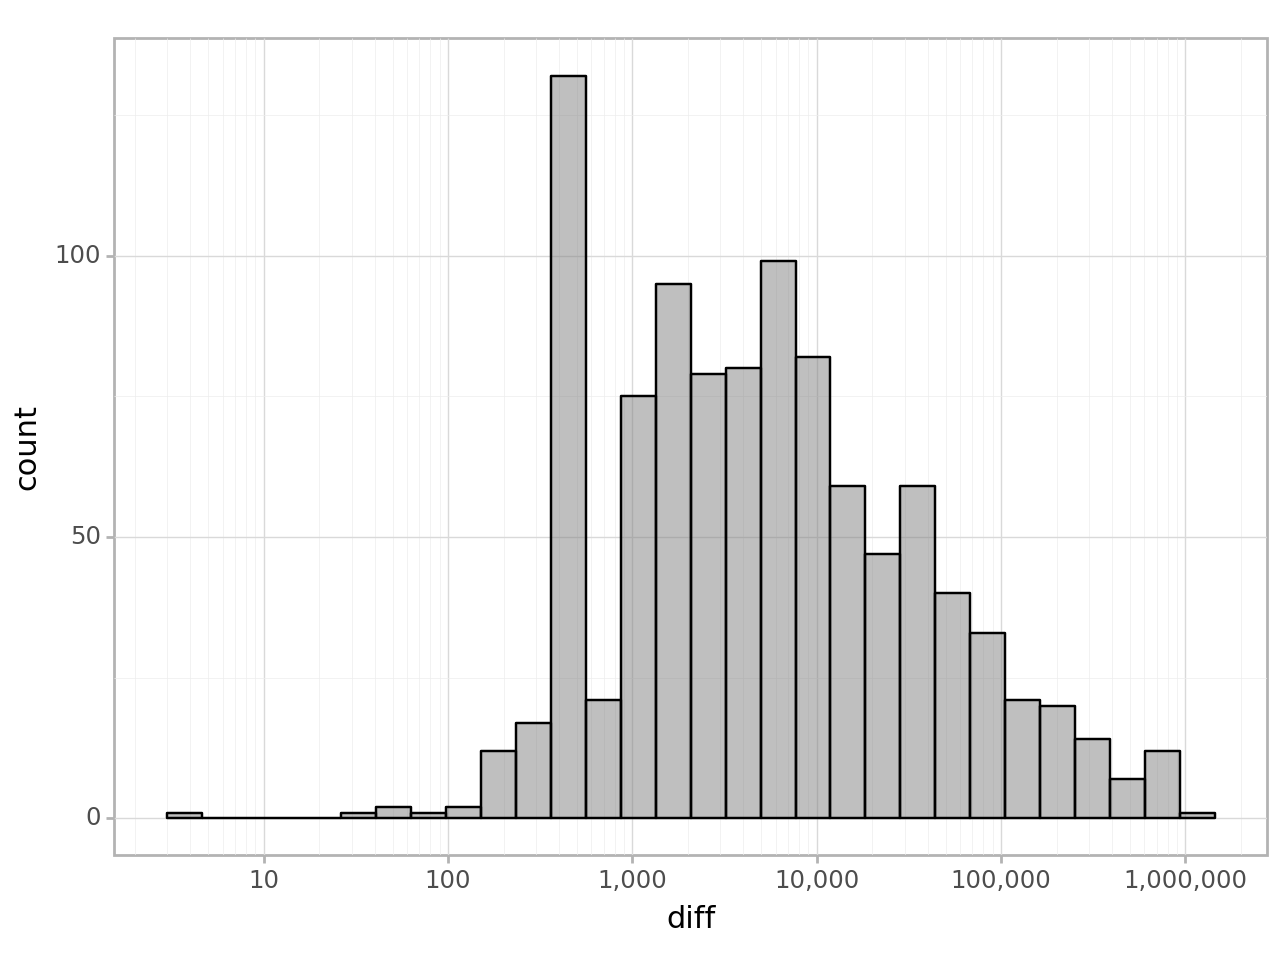

<Figure Size: (640 x 480)>

In [22]:
# try to visualize distributution of differences in engagement
(
    ggplot(df2, aes(x = "diff"))
      + geom_histogram(bins = 30, color = "black", fill = "gray", alpha = 0.5)
      + theme_light()
      + scale_x_log10(breaks = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8], labels = comma_format())
)

In [23]:
# See: https://stackoverflow.com/questions/579310/formatting-long-numbers-as-strings
# convert to easy to read format, like "8.12M"
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [24]:
# top engagement gainers df cleaned
df_gainers = df[df["Title"].isin(df2["Title"][-3:])]
df_gainers["Hours Viewed Per Day Clean"] = df_gainers["Hours Viewed Per Day"].apply(lambda x: human_format(x))
df_gainers

<ipython-input-24-eebd14b324b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Title,Release Date,Days in Measurement Period,Hours Viewed Per Day,Period2023,Hours Viewed Per Day Clean
842,Young Sheldon: Season 1,2023-01-01,181,1.364641e+05,First Half,136K
8243,Gossip Girl (2007): Season 2,2023-01-01,181,4.972376e+03,First Half,4.97K
8242,Gossip Girl (2007): Season 1,2023-01-01,181,4.972376e+03,First Half,4.97K
23,Young Sheldon: Season 1,2023-07-01,184,1.023913e+06,Second Half,1.02M
92,Gossip Girl (2007): Season 1,2023-07-01,184,8.875000e+05,Second Half,888K
152,Gossip Girl (2007): Season 2,2023-07-01,184,9.461957e+05,Second Half,946K


In [25]:
# top engagement losers df cleaned
df_losers = df[df["Title"].isin(df2["Title"][:3])]
df_losers["Hours Viewed Per Day Clean"] = df_losers["Hours Viewed Per Day"].apply(lambda x: human_format(x))
df_losers

<ipython-input-25-569d905c5070>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Title,Release Date,Days in Measurement Period,Hours Viewed Per Day,Period2023,Hours Viewed Per Day Clean
0,The Night Agent: Season 1,2023-03-23,100,8.121000e+06,First Half,8.12M
4,Queen Charlotte: A Bridgerton Story,2023-05-04,58,8.672414e+06,First Half,8.67M
9,FUBAR: Season 1,2023-05-25,37,7.194595e+06,First Half,7.19M
44,The Night Agent: Season 1,2023-03-23,184,8.451087e+05,Second Half,845K
112,Queen Charlotte: A Bridgerton Story,2023-05-04,184,4.217391e+05,Second Half,422K
170,FUBAR: Season 1,2023-05-25,184,3.461957e+05,Second Half,346K


In [26]:
# See: https://plotnine.org/reference/geom_violin.html#violins-boxes-points-lines
# Parts of code below adapated from the tutorial on that plot

def alt_sign(x):
    "Alternate +1/-1 if x is even/odd"
    return (-1) ** x

def clean_title(s):
    idx = s.find('/')
    return s[:idx]

# different aes layers
m1 = aes(x=stage("Period2023", after_scale="x+shift*alt_sign(x)"))  # shift outward
m2 = aes(x=stage("Period2023", after_scale="x-shift*alt_sign(x)"), group="Title")  # shift inward
m3 = aes(x=stage("Period2023", after_scale="x-shift*alt_sign(x)"), group="Title")  # shift inward
m4 = aes(x=stage("Period2023", after_scale="x-shift*alt_sign(x)"), label="Hours Viewed Per Day Clean",
         group="Title")  # shift inward
shift = 0.16
plot1 = (
    # ggplot(pd.concat([top, bottom]), aes("Period2023", "Hours Viewed Per Day", fill = "Period2023"))
    # ggplot(df.sample(frac=0.1, random_state=2), aes("Period2023", "Hours Viewed Per Day", fill = "Period2023"))
    ggplot(df, aes("Period2023", "Hours Viewed Per Day", fill = "Period2023"))
    + geom_violin(m1, style="left-right")  # changed
    + geom_point(m2, color="none")
    + geom_boxplot(width=shift)
    + geom_line(m2, color = "gray", alpha=0.03)  # first layer of gray lines
    + geom_line(df_losers, m3, color="red", alpha=0.7)  # red lines for losers
    + geom_line(df_gainers, m3, color="green", alpha=0.7)  # green lines for gainers
    + geom_label(df_losers.iloc[[0,3,5],:], m4)
    + geom_label(df_gainers.iloc[[0,1],:], m4)
    # below will get the title of the shows on the plot
    + annotate('text', x=1.55, y=2500000, size = 10, angle = -23, label = df_losers["Title"].iloc[0])
    + annotate('text', x=1.6, y=1310000, size = 8, angle = -30, label = df_losers["Title"].iloc[1])
    + annotate('text', x=1.63, y=720000, size = 10, angle = -30, label = df_losers["Title"].iloc[2])
    + annotate('text', x=1.42, y=340000, size = 9, angle = 21, label = df_gainers["Title"].iloc[0])
    + annotate('text', x=1.38, y=33000, size = 10, angle = 46, label = df_gainers["Title"].iloc[1])
    + annotate('text', x=1.44, y=32000, size = 10, angle = 46, label = df_gainers["Title"].iloc[2])
    + scale_fill_manual(values=["#95d2ff", "#ffcd60"])
    # + scale_y_log10(breaks = [10**1, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8], labels = comma_format())
    + scale_y_log10(labels = comma_format())
    + labs(title = "Netflix Shows: Top 3 Gainers and Losers in 2023",
           subtitle = "The Night Agent: Season 1 was viewed 8.12M hours/day in 2023 H1, but only 845K hours/day in 2023 H2",
           x = "Time Period in 2023",
           y = "Average Hours Viewed Per Show Per Day")
    + guides(fill=False)  # Turn off the fill legend
    + theme_light()
)

/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 9.2 x 6.8999999999999995 in image.
/usr/local/lib/python3.10/dist-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: netflix_trends.png


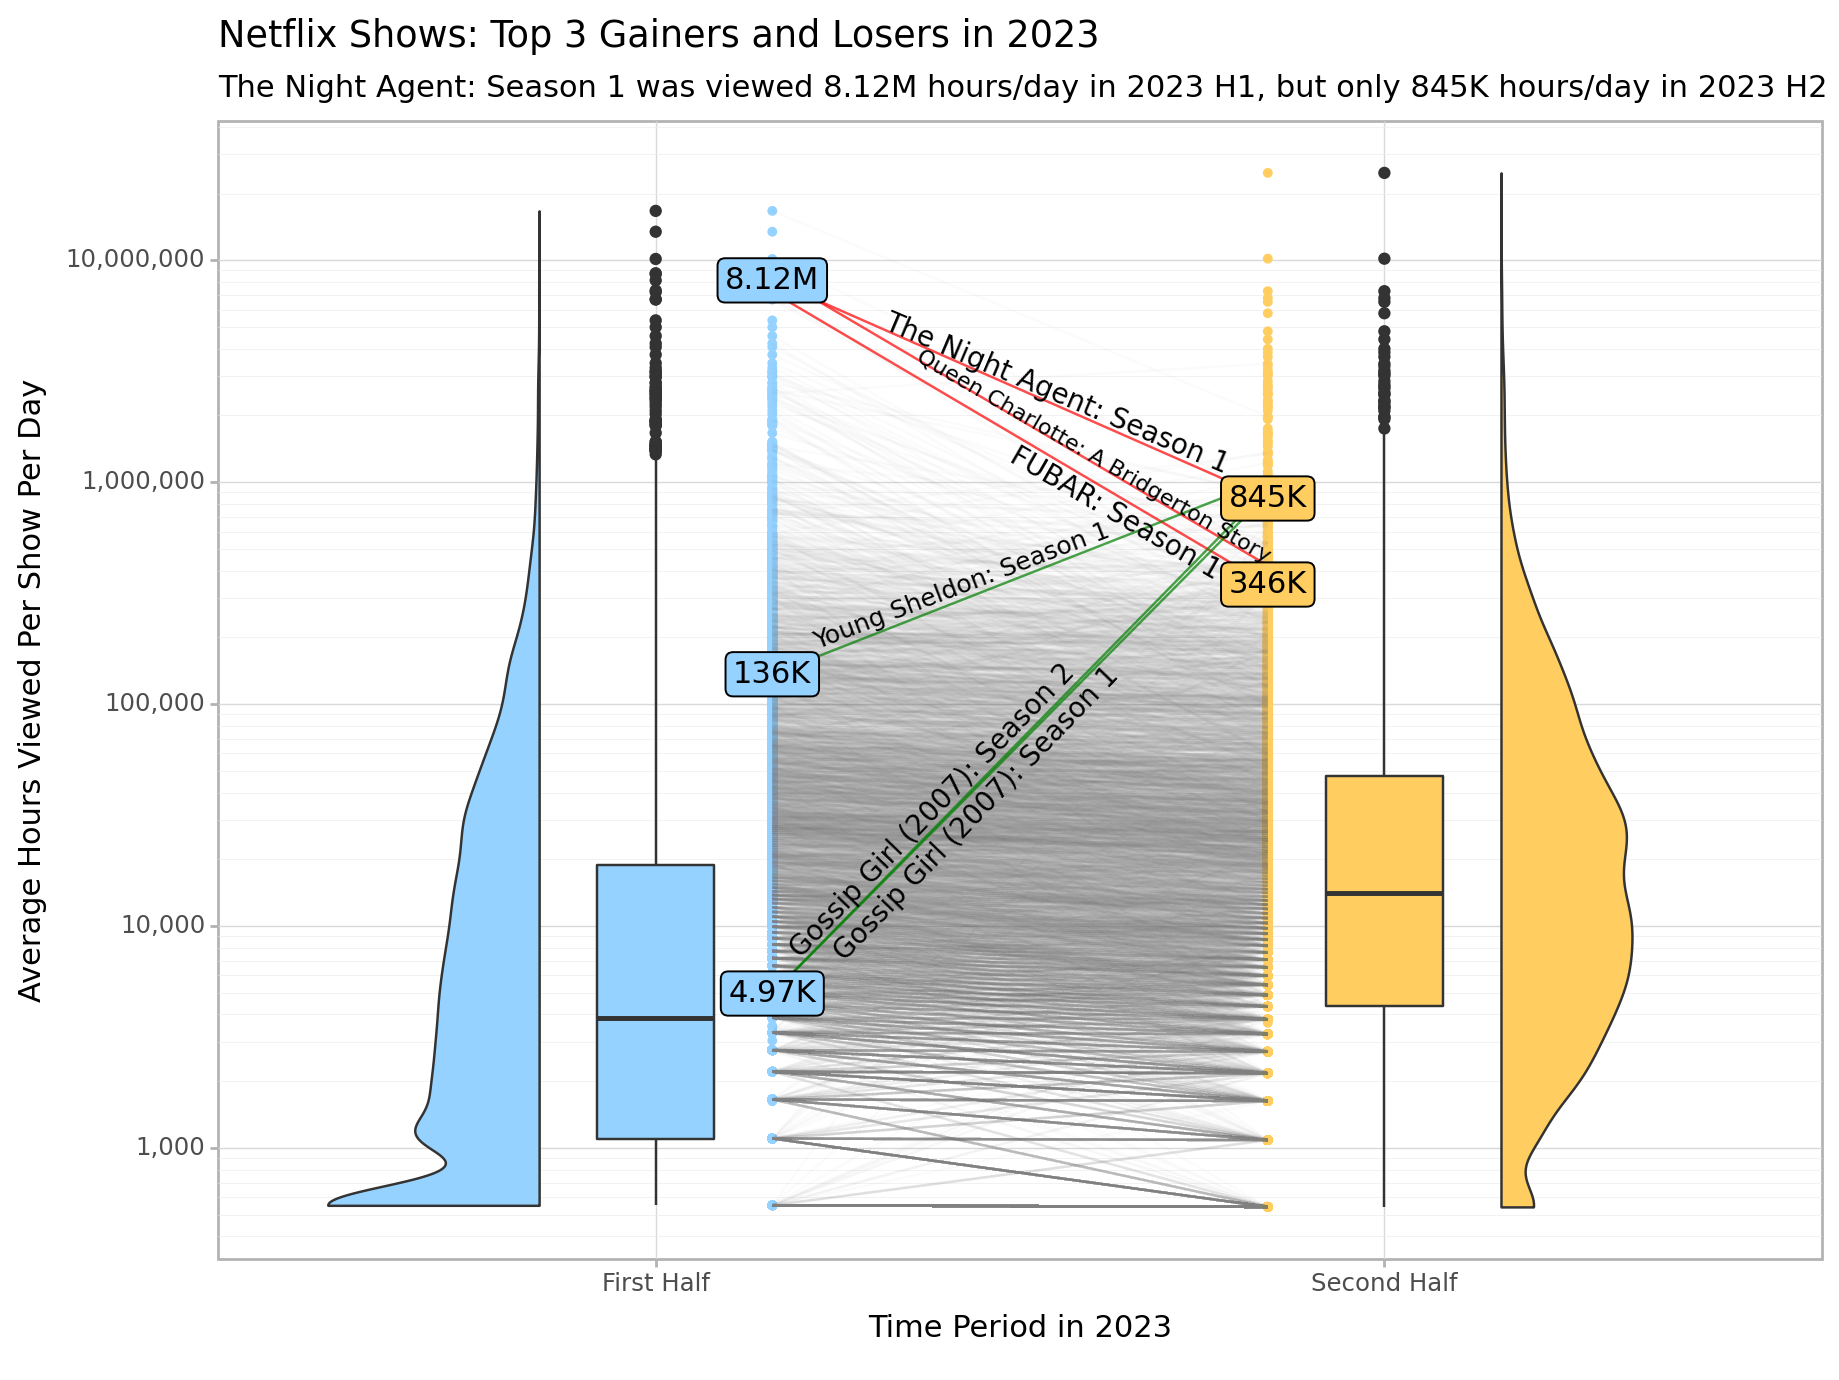

<Figure Size: (919 x 690)>

In [27]:
scale = 1.15
plot1_final = (
    plot1
    + theme(figure_size=(8*scale, 6*scale))
)
ggsave(plot1_final, "netflix_trends.png", dpi=300, limitsize=False) # comment out if you don't want to save to Google Drive
plot1_final